# Analysis of thermistor calibration

In [4]:
import sys
sys.path.append('../')

from SteinhartHart import SteinHart
from formulas import Physical_Unit
from physical_units import *

import matplotlib
%matplotlib inline

import pandas as pd
import numpy as np 

## 1. Retrieve the data

3 measurements were performed.

We will fetch the data and store it in [dataframes](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

In [8]:
df_cold = pd.read_csv('../data/rev_csv_2018-11-27_10-35.csv')
df_hot = pd.read_csv('../data/rev_csv_2018-11-27_11-02.csv')
df_avg = pd.read_csv('../data/rev_csv_2018-11-20_11-18.csv')

### 1.1 Analyse the data

## 2. Define The prediction intervals

In [6]:
##################################
#       Hyperparameters
##################################
min_temp = 10   # the  minimum temperature we will predict
max_temp = 40   # the maximum temperature we will predict
avg_temp = 26   # the average temperature we will predict

fluctuation = 0.3
precision_adc = 10

## Define the accuracy


In [7]:
print("minium precision:", round((max_temp - min_temp)/(2**precision_adc), 3), "degrees")

minium precision: 0.029 degrees


## Retrieve the data

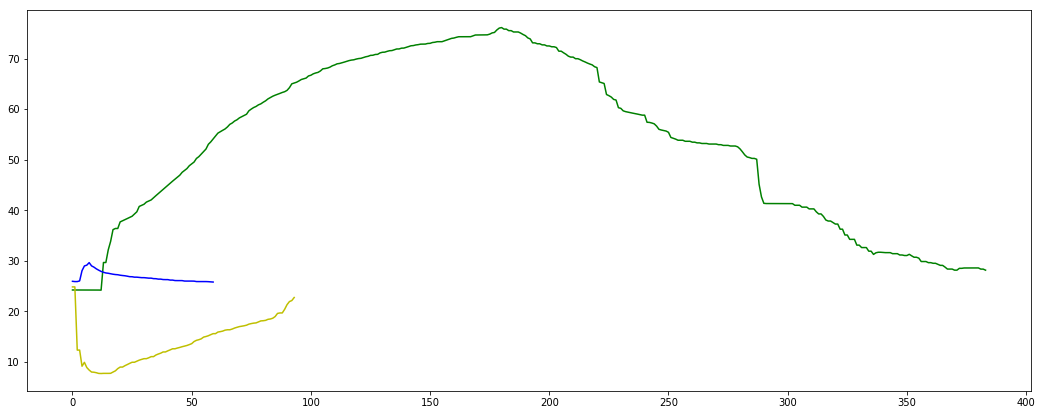

In [4]:
df_hot['Tprobe'].plot(figsize=(18, 7), c='g',)
df_avg['Tprobe'].plot(figsize=(18, 7), c='b')
df_cold['Tprobe'].plot(figsize=(18, 7), c='y')

## Query the min max and average temperature to calculate the coefficients

In [5]:
df_cold.query(" Tprobe < " + str(min_temp) + " + " + str(fluctuation) + " and Tprobe > " + str(min_temp) + " - " + str(fluctuation)).head(2)

,Unnamed: 0,RNTC,Tprobe,Tcalc,A,B,C,T1,R1,T2,R2,T3,R3
5,5,92633.429395,9.859467,9.555594,-0.006903,0.001273,-0.000003,9.088684,95519.558824,12.28146,78797.142857,24.78897,45995.480769
25,25,94682.894737,9.873291,9.002135,-0.005254,0.001048,-0.000002,7.646210,103049.535604,12.28146,78797.142857,24.78897,45995.480769


In [6]:
df_hot.query(" Tprobe < " + str(max_temp) + " + " + str(fluctuation) + " and Tprobe > " + str(max_temp) + " - " + str(fluctuation)).head(2)

,Unnamed: 0,RNTC,Tprobe,Tcalc,A,B,C,T1,R1,T2,R2,T3,R3
309,309,23050.362845,40.23434,39.756695,-0.000756,0.000467,-7.253362e-07,24.16681,47643.052838,50.23169,15378.39586,76.13272,6800.446927
310,310,23255.895197,40.23434,39.542279,-0.000756,0.000467,-7.253362e-07,24.16681,47643.052838,50.23169,15378.39586,76.13272,6800.446927


In [7]:
df_avg.query(" Tprobe < " + str(avg_temp) + " + " + str(fluctuation) + " and Tprobe > " + str(avg_temp) + " - " + str(fluctuation)).head(2)

,Unnamed: 0,RNTC,Tprobe,Tcalc,A,B,C,T1,R1,T2,R2,T3,R3
0,0,43918.644068,25.89944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,43918.644068,25.84610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
steinhart = SteinHart()
steinhart.feed(T=9.873291, R=94682.894737)
steinhart.feed(T=26.04834, R=43235.887850)
steinhart.feed(T=40.23434, R=23050.362845)

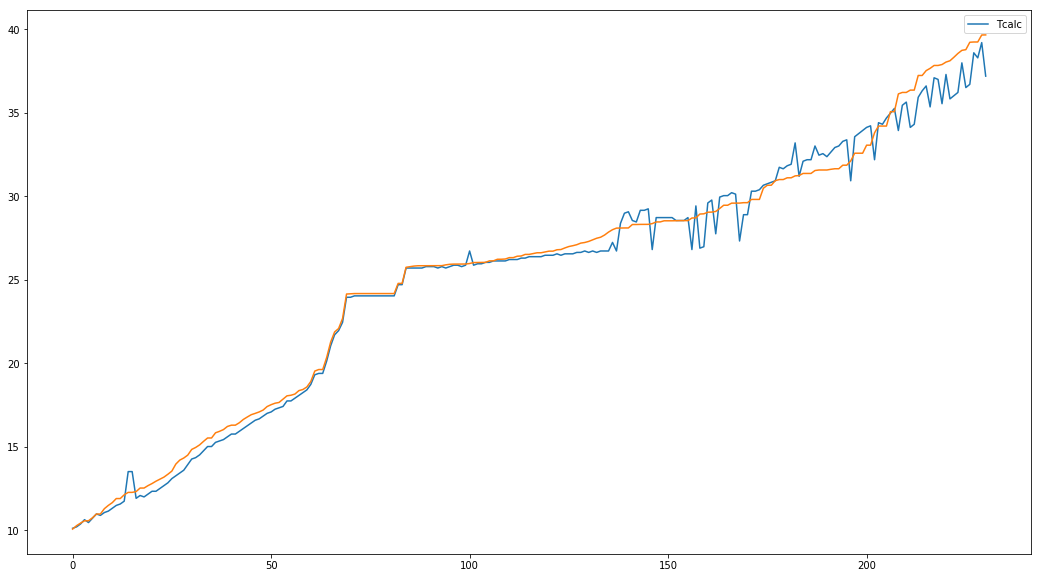

In [13]:
plt_min_T = 10
plt_max_T = 40

df_pred = df_cold[df_cold['Tprobe'] >= plt_min_T]
df_pred = df_pred.append(df_hot[df_hot['Tprobe'] <= plt_max_T], ignore_index=True)
df_pred = df_pred.append(df_avg, ignore_index=True)
df_pred = df_pred.sort_values('Tprobe').reset_index()

# .query("Tprobe > " + str(min_temp) + " and Tprobe < " + str(max_temp))
df_pred['Tcalc'] = df_pred.apply(lambda r: steinhart.calculateT(r["RNTC"]), axis=1)
df_pred['Tcalc'].plot(figsize=(18, 10), legend=True)
df_pred['Tprobe'].plot()